# Nifty 50 Analytics: Trends, Patterns, and Insights
#### Analyzing stock market trends involves examining various aspects of stock prices, trading volumes, and other market indicators to identify patterns and predict future movements.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

#### Loading the dataset

In [4]:
df= pd.read_csv("Nifty-50.csv")

#### Inspecting the data

In [5]:
df.shape

(50, 13)

In [6]:
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [13]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng'],
      dtype='object')

## Data Cleaning

In [7]:
pd.isnull(df)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isnull(df).sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

In [11]:
df['Low'].dtypes

dtype('O')

## Exploratory Data Analysis

In [14]:
df.describe()

,Chng,% Chng,Volume (lacs),365 d % chng,30 d % chng
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-70.133000,-2.930200,71.266600,41.203000,-5.996800
std,163.203678,2.677007,93.462062,37.358646,6.322546
min,-770.500000,-7.480000,0.300000,-16.020000,-22.080000
25%,-66.775000,-4.527500,13.472500,9.375000,-9.665000
50%,-29.975000,-3.300000,30.750000,35.860000,-5.705000
75%,-7.812500,-1.932500,99.200000,65.942500,-2.222500
max,158.400000,7.230000,517.880000,167.950000,6.360000


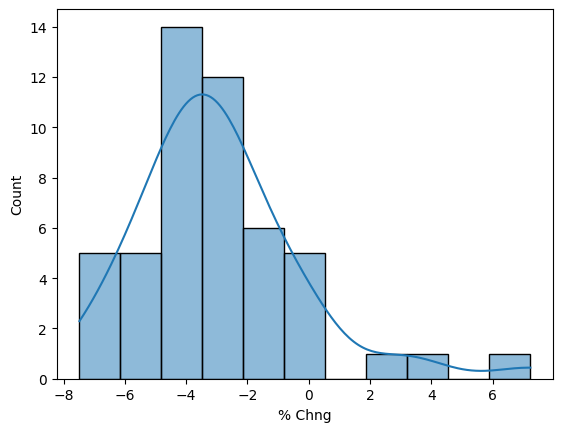

In [26]:
sns.histplot(df['% Chng'], kde=True)
plt.show()

## Data Visualisation

#### Time Series Analysis: open, high, low, LTP

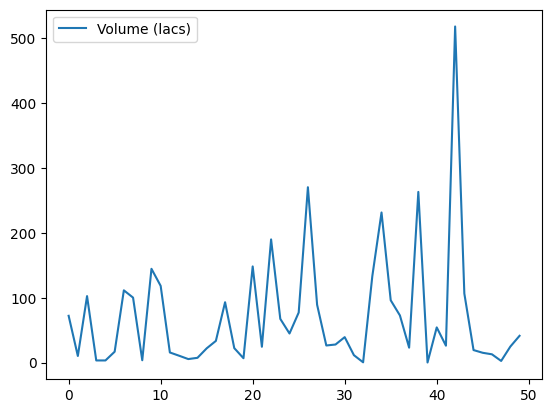

In [29]:
df.plot(y=['Volume (lacs)', 'Turnover (crs.)'], subplots=True)
plt.show()


#### Stock Performance

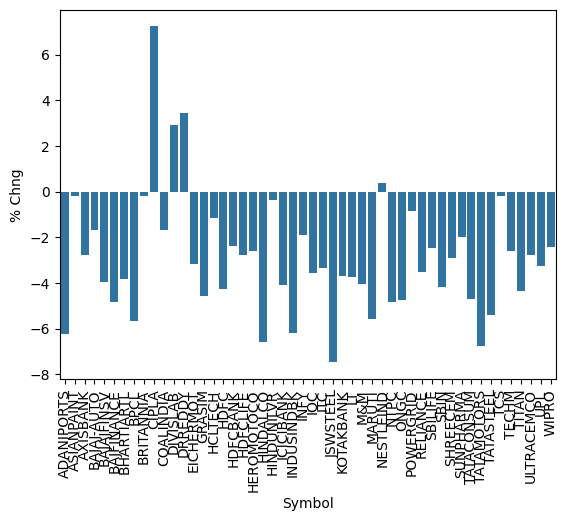

In [30]:
sns.barplot(x='Symbol', y='% Chng', data=df)
plt.xticks(rotation=90)
plt.show()